In [1]:
PATH='/home/kirana/Documents/phd/exp3_autoencoder'
DATAPATH='/home/kirana/Documents/final_dissertation_final/experiments/datasets/bookcrossing'

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import os
import pickle
import torch
from torch.utils.data import Dataset, DataLoader
from torch import nn

In [3]:
[df, df_train,df_valid,df,df_ratings,idx_to_user,\
             idx_to_movie,movie_to_idx,user_to_idx]=pickle.load(open(f'{DATAPATH}/reads.pkl','rb'))

In [4]:
df.shape

(1149780, 14)

In [5]:
df.head()

,userId,itemId,rating,Location,Age,Book-Title,Book-Author,Year-Of-Publication,Publisher,random_dstype,user_idx,item_idx,dstype_random_train,dstype_random_valid
1006309,241656,0340824735,7,"melbourn, england, united kingdom",49.0,NaN,NaN,NaN,NaN,train,1,1,1,0
608046,147045,0873512553,0,"saint paul, minnesota, usa",28.0,The days of Rondo,Evelyn Fairbanks,1990,Minnesota Historical Society Press,train,2,2,1,0
871538,210926,0345459202,9,"guelph, ontario, canada",NaN,Big Stone Gap,Adriana Trigiani,2003,Fawcett Books,train,3,3,1,0
752379,182085,0446350451,0,"ginsheim, hessen, germany",NaN,Sensations,Virginia Carry,1988,Warner Books,train,4,4,1,0
124597,28591,0821767445,10,"michie, tennessee, usa",33.0,Jed (Rock Creek Six),Linda Devlin,2001,Zebra Books,train,5,5,1,0


In [6]:
df_train=df.loc[df['random_dstype']=='train']
df_valid=df.loc[df['random_dstype']!='train']

In [7]:
df_train.head()

,userId,itemId,rating,Location,Age,Book-Title,Book-Author,Year-Of-Publication,Publisher,random_dstype,user_idx,item_idx,dstype_random_train,dstype_random_valid
1006309,241656,0340824735,7,"melbourn, england, united kingdom",49.0,NaN,NaN,NaN,NaN,train,1,1,1,0
608046,147045,0873512553,0,"saint paul, minnesota, usa",28.0,The days of Rondo,Evelyn Fairbanks,1990,Minnesota Historical Society Press,train,2,2,1,0
871538,210926,0345459202,9,"guelph, ontario, canada",NaN,Big Stone Gap,Adriana Trigiani,2003,Fawcett Books,train,3,3,1,0
752379,182085,0446350451,0,"ginsheim, hessen, germany",NaN,Sensations,Virginia Carry,1988,Warner Books,train,4,4,1,0
124597,28591,0821767445,10,"michie, tennessee, usa",33.0,Jed (Rock Creek Six),Linda Devlin,2001,Zebra Books,train,5,5,1,0


In [8]:
df_train.shape,df_valid.shape

((1034802, 14), (114978, 14))

### Add the autoencoder features

In [9]:
import pickle

In [10]:
[df_train_user_autoenc,df_valid_user_autoenc,user_mtx_1_weights,user_mtx_2_weights]=\
    pickle.load(open(f'{DATAPATH}/inter/user_autoenc_weights.pkl','rb'))

In [11]:
[df_train_item_autoenc, df_valid_item_autoenc,item_mtx_1_weights,item_mtx_2_weights]=\
    pickle.load(open(f'{DATAPATH}/inter/item_autoenc_weights.pkl','rb'))

In [12]:
df_train_user_autoenc.shape, type(df_train_user_autoenc),df_train_user_autoenc.head()

((105284, 11),
 pandas.core.frame.DataFrame,
    user_idx  user_autoenc0  user_autoenc1  user_autoenc2  user_autoenc3  \
 0         0       1.425841       1.425767       1.425770      -1.425792   
 1         1       1.432288       1.432213       1.432216      -1.432238   
 2         2       1.426912       1.426838       1.426840      -1.426862   
 3         3       1.430663       1.430588       1.430591      -1.430613   
 4         4       1.427409       1.427335       1.427337      -1.427359   
 
    user_autoenc4  user_autoenc5  user_autoenc6  user_autoenc7  user_autoenc8  \
 0       1.425769       1.425740      -1.425740       1.425776      -1.425954   
 1       1.432215       1.432186      -1.432186       1.432222      -1.432401   
 2       1.426840       1.426811      -1.426811       1.426847      -1.427025   
 3       1.430590       1.430561      -1.430561       1.430598      -1.430776   
 4       1.427336       1.427308      -1.427308       1.427344      -1.427522   
 
    user_

In [13]:
df_valid_user_autoenc.shape, type(df_valid_user_autoenc),df_valid_user_autoenc.head()

((105284, 11),
 pandas.core.frame.DataFrame,
    user_idx  user_autoenc0  user_autoenc1  user_autoenc2  user_autoenc3  \
 0         0       1.425841       1.425767       1.425770      -1.425792   
 1         1       1.425845       1.425770       1.425773      -1.425795   
 2         2       1.425841       1.425767       1.425770      -1.425792   
 3         3       1.425944       1.425869       1.425872      -1.425894   
 4         4       1.427388       1.427313       1.427316      -1.427338   
 
    user_autoenc4  user_autoenc5  user_autoenc6  user_autoenc7  user_autoenc8  \
 0       1.425769       1.425740      -1.425740       1.425776      -1.425954   
 1       1.425772       1.425743      -1.425743       1.425780      -1.425958   
 2       1.425769       1.425740      -1.425740       1.425776      -1.425954   
 3       1.425871       1.425843      -1.425843       1.425879      -1.426057   
 4       1.427315       1.427286      -1.427286       1.427323      -1.427501   
 
    user_

In [14]:
df_train_item_autoenc.shape, type(df_train_item_autoenc),df_train_item_autoenc.head()

((340557, 26),
 pandas.core.frame.DataFrame,
    item_idx  item_autoenc0  item_autoenc1  item_autoenc2  item_autoenc3  \
 0         0      -0.940097       0.810064      -1.017249      -0.666996   
 1         1      -0.940097       0.810064      -1.017249      -0.666996   
 2         2      -0.941301       0.811087      -1.018539      -0.667825   
 3         3      -0.940097       0.810064      -1.017249      -0.666996   
 4         4      -0.940134       0.810095      -1.017290      -0.667022   
 
    item_autoenc4  item_autoenc5  item_autoenc6  item_autoenc7  item_autoenc8  \
 0       0.903988       0.870417       0.679674      -1.123469      -0.815247   
 1       0.903988       0.870417       0.679674      -1.123469      -0.815247   
 2       0.905122       0.871517       0.680519      -1.124884      -0.816263   
 3       0.903988       0.870417       0.679674      -1.123469      -0.815247   
 4       0.904024       0.870451       0.679701      -1.123511      -0.815279   
 
    ...  

In [15]:
df_valid_item_autoenc.shape, type(df_valid_item_autoenc),df_valid_item_autoenc.head()

((340557, 26),
 pandas.core.frame.DataFrame,
    item_idx  item_autoenc0  item_autoenc1  item_autoenc2  item_autoenc3  \
 0         0      -0.940097       0.810064      -1.017249      -0.666996   
 1         1      -0.940097       0.810064      -1.017249      -0.666996   
 2         2      -0.940097       0.810064      -1.017249      -0.666996   
 3         3      -0.940097       0.810064      -1.017249      -0.666996   
 4         4      -0.940097       0.810064      -1.017249      -0.666996   
 
    item_autoenc4  item_autoenc5  item_autoenc6  item_autoenc7  item_autoenc8  \
 0       0.903988       0.870417       0.679674      -1.123469      -0.815247   
 1       0.903988       0.870417       0.679674      -1.123469      -0.815247   
 2       0.903988       0.870417       0.679674      -1.123469      -0.815247   
 3       0.903988       0.870417       0.679674      -1.123469      -0.815247   
 4       0.903988       0.870417       0.679674      -1.123469      -0.815247   
 
    ...  

In [16]:
df_valid_user_autoenc.isnull().any()

user_idx         False
user_autoenc0    False
user_autoenc1    False
user_autoenc2    False
user_autoenc3    False
user_autoenc4    False
user_autoenc5    False
user_autoenc6    False
user_autoenc7    False
user_autoenc8    False
user_autoenc9    False
dtype: bool

In [17]:
df_valid.isnull().any()

userId                 False
itemId                 False
rating                 False
Location               False
Age                     True
Book-Title              True
Book-Author             True
Year-Of-Publication     True
Publisher               True
random_dstype          False
user_idx               False
item_idx               False
dstype_random_train    False
dstype_random_valid    False
dtype: bool

In [19]:
movie_to_idx["0425169782"], len(movie_to_idx)

(340556, 340556)

In [20]:
df_valid.loc[df_valid['item_idx']==340556]

,userId,itemId,rating,Location,Age,Book-Title,Book-Author,Year-Of-Publication,Publisher,random_dstype,user_idx,item_idx,dstype_random_train,dstype_random_valid
236149,55027,0425169782,0,"burlington, north carolina, usa",44.0,Spiderman: Venom Factor,Diane Duane,1995,Byron Preiss Multimedia Books,test,19266,340556,0,1


In [21]:
df_train.loc[df_train['user_idx']==55027]

,userId,itemId,rating,Location,Age,Book-Title,Book-Author,Year-Of-Publication,Publisher,random_dstype,user_idx,item_idx,dstype_random_train,dstype_random_valid
92490,20839,1550502654,8,"port coquitlam, british columbia, canada",75.0,Residual Desire,Jacqueline Jill Robinson,2004,Coteau Books,train,55027,164618,1,0


In [22]:
df_valid_item_autoenc.loc[df_valid_item_autoenc['item_idx']==340556]

,item_idx,item_autoenc0,item_autoenc1,item_autoenc2,item_autoenc3,item_autoenc4,item_autoenc5,item_autoenc6,item_autoenc7,item_autoenc8,...,item_autoenc15,item_autoenc16,item_autoenc17,item_autoenc18,item_autoenc19,item_autoenc20,item_autoenc21,item_autoenc22,item_autoenc23,item_autoenc24
340556,340556,-0.940097,0.810064,-1.017249,-0.666996,0.903988,0.870417,0.679674,-1.123469,-0.815247,...,0.839201,-0.769139,0.881491,1.013894,-0.744449,-0.839028,-0.750114,-0.893549,0.91807,-0.815288


In [23]:
df_train.isnull().any()

userId                 False
itemId                 False
rating                 False
Location               False
Age                     True
Book-Title              True
Book-Author             True
Year-Of-Publication     True
Publisher               True
random_dstype          False
user_idx               False
item_idx               False
dstype_random_train    False
dstype_random_valid    False
dtype: bool

In [24]:
df_train.shape, df_valid.shape

((1034802, 14), (114978, 14))

In [25]:
df_train.head()

,userId,itemId,rating,Location,Age,Book-Title,Book-Author,Year-Of-Publication,Publisher,random_dstype,user_idx,item_idx,dstype_random_train,dstype_random_valid
1006309,241656,0340824735,7,"melbourn, england, united kingdom",49.0,NaN,NaN,NaN,NaN,train,1,1,1,0
608046,147045,0873512553,0,"saint paul, minnesota, usa",28.0,The days of Rondo,Evelyn Fairbanks,1990,Minnesota Historical Society Press,train,2,2,1,0
871538,210926,0345459202,9,"guelph, ontario, canada",NaN,Big Stone Gap,Adriana Trigiani,2003,Fawcett Books,train,3,3,1,0
752379,182085,0446350451,0,"ginsheim, hessen, germany",NaN,Sensations,Virginia Carry,1988,Warner Books,train,4,4,1,0
124597,28591,0821767445,10,"michie, tennessee, usa",33.0,Jed (Rock Creek Six),Linda Devlin,2001,Zebra Books,train,5,5,1,0


In [26]:
df_train=pd.merge(df_train,df_train_item_autoenc,on='item_idx',how='left')

In [27]:
df_train.shape

(1034802, 39)

In [28]:
print(df_valid.shape)
df_valid=pd.merge(df_valid,df_valid_item_autoenc,on='item_idx',how='left')
df_valid.shape

(114978, 14)


(114978, 39)

In [29]:
df_valid.shape

(114978, 39)

In [30]:
print(df_valid.shape)
df_valid=pd.merge(df_valid,df_valid_user_autoenc,on='user_idx',how='left')
df_valid.shape

(114978, 39)


(114978, 49)

In [31]:
print(df_train.shape)
df_train=pd.merge(df_train,df_train_user_autoenc,on='user_idx',how='left')
df_train.shape

(1034802, 39)


(1034802, 49)

In [32]:
df_train.columns

Index(['userId', 'itemId', 'rating', 'Location', 'Age', 'Book-Title',
       'Book-Author', 'Year-Of-Publication', 'Publisher', 'random_dstype',
       'user_idx', 'item_idx', 'dstype_random_train', 'dstype_random_valid',
       'item_autoenc0', 'item_autoenc1', 'item_autoenc2', 'item_autoenc3',
       'item_autoenc4', 'item_autoenc5', 'item_autoenc6', 'item_autoenc7',
       'item_autoenc8', 'item_autoenc9', 'item_autoenc10', 'item_autoenc11',
       'item_autoenc12', 'item_autoenc13', 'item_autoenc14', 'item_autoenc15',
       'item_autoenc16', 'item_autoenc17', 'item_autoenc18', 'item_autoenc19',
       'item_autoenc20', 'item_autoenc21', 'item_autoenc22', 'item_autoenc23',
       'item_autoenc24', 'user_autoenc0', 'user_autoenc1', 'user_autoenc2',
       'user_autoenc3', 'user_autoenc4', 'user_autoenc5', 'user_autoenc6',
       'user_autoenc7', 'user_autoenc8', 'user_autoenc9'],
      dtype='object')

In [33]:
autoenc_cols=df_train.columns[df_train.columns.str.contains('autoenc')]

In [34]:
autoenc_cols=autoenc_cols.tolist()

In [35]:
autoenc_cols

['item_autoenc0',
 'item_autoenc1',
 'item_autoenc2',
 'item_autoenc3',
 'item_autoenc4',
 'item_autoenc5',
 'item_autoenc6',
 'item_autoenc7',
 'item_autoenc8',
 'item_autoenc9',
 'item_autoenc10',
 'item_autoenc11',
 'item_autoenc12',
 'item_autoenc13',
 'item_autoenc14',
 'item_autoenc15',
 'item_autoenc16',
 'item_autoenc17',
 'item_autoenc18',
 'item_autoenc19',
 'item_autoenc20',
 'item_autoenc21',
 'item_autoenc22',
 'item_autoenc23',
 'item_autoenc24',
 'user_autoenc0',
 'user_autoenc1',
 'user_autoenc2',
 'user_autoenc3',
 'user_autoenc4',
 'user_autoenc5',
 'user_autoenc6',
 'user_autoenc7',
 'user_autoenc8',
 'user_autoenc9']

In [36]:
df_train.head()

,userId,itemId,rating,Location,Age,Book-Title,Book-Author,Year-Of-Publication,Publisher,random_dstype,...,user_autoenc0,user_autoenc1,user_autoenc2,user_autoenc3,user_autoenc4,user_autoenc5,user_autoenc6,user_autoenc7,user_autoenc8,user_autoenc9
0,241656,0340824735,7,"melbourn, england, united kingdom",49.0,NaN,NaN,NaN,NaN,train,...,1.432288,1.432213,1.432216,-1.432238,1.432215,1.432186,-1.432186,1.432222,-1.432401,-1.432210
1,147045,0873512553,0,"saint paul, minnesota, usa",28.0,The days of Rondo,Evelyn Fairbanks,1990,Minnesota Historical Society Press,train,...,1.426912,1.426838,1.426840,-1.426862,1.426840,1.426811,-1.426811,1.426847,-1.427025,-1.426835
2,210926,0345459202,9,"guelph, ontario, canada",NaN,Big Stone Gap,Adriana Trigiani,2003,Fawcett Books,train,...,1.430663,1.430588,1.430591,-1.430613,1.430590,1.430561,-1.430561,1.430598,-1.430776,-1.430585
3,182085,0446350451,0,"ginsheim, hessen, germany",NaN,Sensations,Virginia Carry,1988,Warner Books,train,...,1.427409,1.427335,1.427337,-1.427359,1.427336,1.427308,-1.427308,1.427344,-1.427522,-1.427332
4,28591,0821767445,10,"michie, tennessee, usa",33.0,Jed (Rock Creek Six),Linda Devlin,2001,Zebra Books,train,...,1.431433,1.431358,1.431361,-1.431383,1.431360,1.431331,-1.431331,1.431368,-1.431546,-1.431355


In [37]:
df_train[['user_idx','item_idx']+autoenc_cols].head()

,user_idx,item_idx,item_autoenc0,item_autoenc1,item_autoenc2,item_autoenc3,item_autoenc4,item_autoenc5,item_autoenc6,item_autoenc7,...,user_autoenc0,user_autoenc1,user_autoenc2,user_autoenc3,user_autoenc4,user_autoenc5,user_autoenc6,user_autoenc7,user_autoenc8,user_autoenc9
0,1,1,-0.940097,0.810064,-1.017249,-0.666996,0.903988,0.870417,0.679674,-1.123469,...,1.432288,1.432213,1.432216,-1.432238,1.432215,1.432186,-1.432186,1.432222,-1.432401,-1.432210
1,2,2,-0.941301,0.811087,-1.018539,-0.667825,0.905122,0.871517,0.680519,-1.124884,...,1.426912,1.426838,1.426840,-1.426862,1.426840,1.426811,-1.426811,1.426847,-1.427025,-1.426835
2,3,3,-0.940097,0.810064,-1.017249,-0.666996,0.903988,0.870417,0.679674,-1.123469,...,1.430663,1.430588,1.430591,-1.430613,1.430590,1.430561,-1.430561,1.430598,-1.430776,-1.430585
3,4,4,-0.940134,0.810095,-1.017290,-0.667022,0.904024,0.870451,0.679701,-1.123511,...,1.427409,1.427335,1.427337,-1.427359,1.427336,1.427308,-1.427308,1.427344,-1.427522,-1.427332
4,5,5,-0.941712,0.811428,-1.018983,-0.668113,0.905508,0.871896,0.680810,-1.125362,...,1.431433,1.431358,1.431361,-1.431383,1.431360,1.431331,-1.431331,1.431368,-1.431546,-1.431355


In [38]:
df_valid['rating'].describe(),df_train['rating'].describe()

(count    114978.000000
 mean          2.850806
 std           3.850807
 min           0.000000
 25%           0.000000
 50%           0.000000
 75%           7.000000
 max          10.000000
 Name: rating, dtype: float64, count    1.034802e+06
 mean     2.868744e+00
 std      3.854557e+00
 min      0.000000e+00
 25%      0.000000e+00
 50%      0.000000e+00
 75%      7.000000e+00
 max      1.000000e+01
 Name: rating, dtype: float64)

### Dataset and DataLoader

In [39]:
class cfdata (torch.utils.data.dataset.Dataset):
    def __init__(self,dfX,dfY,denseCols):
        self.dfX,self.dfY=dfX,dfY
        self.denseCols=denseCols
        
    def __len__ (self):
        return self.dfX.shape[0]
    
    def __getitem__ (self, idx):
        return torch.FloatTensor(self.dfX.iloc[idx].values),torch.FloatTensor([self.dfY.values[idx]])

In [40]:
dstrain=cfdata(df_train[['user_idx','item_idx']+autoenc_cols],df_train['rating'],autoenc_cols)
dsvalid=cfdata(df_valid[['user_idx','item_idx']+autoenc_cols],df_valid['rating'],autoenc_cols)

In [41]:
df_train.shape

(1034802, 49)

In [42]:
bs=64

In [43]:
dltrain=DataLoader(dstrain,bs,True)

In [44]:
dlvalid=DataLoader(dsvalid,bs,True)

In [45]:
610/10, 9724/25

(61.0, 388.96)

In [46]:
len(user_to_idx),len(movie_to_idx)

(105283, 340556)

## Model Architecture

In [47]:
n_users=len(user_to_idx)
n_movies=len(movie_to_idx)
n_emb_user=100
n_emb_movie=250
min_rating=min(df_train['rating'])
max_rating=max(df_train['rating'])
dropout_e=0.05
hidden=[75,15]
dropouts=[0.2,0.2]

In [48]:
def hidden_layer(x,y,dropout,activation=nn.Sigmoid()):
    return nn.Sequential(
        nn.Linear(x, y),
        activation,
        nn.Dropout(p=dropout)
        )   

In [49]:
class cf(nn.Module):    
    def __init__(self,n_users,n_emb_user,n_emb_movie,n_movies,min_rating,max_rating,autoenc_cols,\
                 dropout_e=0.01,hidden=[15,5],dropouts=[0.2,0.2]):
        super().__init__()
        self.n_users,self.n_emb_user,self.n_emb_movie,self.n_movies,self.min_rating,self.max_rating=\
                    n_users,n_emb_user,n_emb_movie,n_movies,min_rating,max_rating
        self.dropout_e,self.hidden,self.dropouts=dropout_e,hidden,dropouts
        self.autoenc_cols,self.len_dense_cols=autoenc_cols,len(autoenc_cols)
        self.create_architecture()
        self.criterion=nn.MSELoss()
        
        
    def create_architecture(self):
        self.emb_user=nn.Embedding(self.n_users+1,self.n_emb_user)
        self.emb_movie=nn.Embedding(self.n_movies+1,self.n_emb_movie)
        self.emb_dropout=nn.Dropout(self.dropout_e)

        
        self.lin1= nn.Sequential(nn.Linear(self.n_emb_user+self.n_emb_movie,self.hidden[0]),
                    nn.ReLU(),
                    nn.Dropout(p=dropouts[0]) )
        self.lin2= nn.Sequential (nn.Linear(self.len_dense_cols,self.hidden[1]),
                    nn.ReLU(),
                    nn.Dropout(p=dropouts[1]) )
        self.lin3= nn.Sequential (nn.Linear(self.hidden[0]+self.hidden[1],self.hidden[1]),
                    nn.ReLU(),
                    nn.Dropout(p=dropouts[1]))
        self.lin4=nn.Linear(self.hidden[1],1)
        self.sigmoid=nn.Sigmoid()
        
        
    def init_parameters(self):
        nn.init.kaiming_normal_(self.emb_user.weight.data)
        nn.init.kaiming_normal_(self.emb_movie.weight.dat)
        #nn.init.kaiming_normal_(lin)
       
    def forward (self,Xb,Yb):
        users=Xb[:,0].long()
        items=Xb[:,1].long()
        users=self.emb_dropout(self.emb_user(users))
        items=self.emb_dropout(self.emb_movie(items))
        
        denses=Xb[:,2:]
        embed=torch.cat([users,items],1)
        
        out1=self.lin1(embed)
        out2=self.lin2(denses)
        out3=torch.cat([out1,out2],1)
        out4=self.lin3(out3)
        out5=self.lin4(out4)
        
        out=self.sigmoid(out5)
        
        preds=out*(self.max_rating-self.min_rating)+self.min_rating
        #preds=preds.view(-1)
        loss=self.criterion(preds,Yb)
        return preds,loss

In [50]:
cfobj=cf(n_users,n_emb_user,n_emb_movie,n_movies,min_rating,max_rating,autoenc_cols,dropout_e,hidden,dropouts)

In [51]:
cfobj

cf(
  (emb_user): Embedding(105284, 100)
  (emb_movie): Embedding(340557, 250)
  (emb_dropout): Dropout(p=0.05)
  (lin1): Sequential(
    (0): Linear(in_features=350, out_features=75, bias=True)
    (1): ReLU()
    (2): Dropout(p=0.2)
  )
  (lin2): Sequential(
    (0): Linear(in_features=35, out_features=15, bias=True)
    (1): ReLU()
    (2): Dropout(p=0.2)
  )
  (lin3): Sequential(
    (0): Linear(in_features=90, out_features=15, bias=True)
    (1): ReLU()
    (2): Dropout(p=0.2)
  )
  (lin4): Linear(in_features=15, out_features=1, bias=True)
  (sigmoid): Sigmoid()
  (criterion): MSELoss()
)

In [52]:
for Xb, Yb in dltrain:
    break

In [53]:
Xb.shape, Yb.shape

(torch.Size([64, 37]), torch.Size([64, 1]))

In [54]:
Xb.dtype

torch.float32

In [55]:
cfobj.forward(Xb,Yb)

(tensor([[5.1048],
         [5.3321],
         [5.4730],
         [5.2366],
         [5.3364],
         [4.6640],
         [5.2334],
         [5.1456],
         [5.2663],
         [5.3257],
         [5.3433],
         [5.0496],
         [5.2726],
         [5.0645],
         [5.4254],
         [4.8435],
         [5.7313],
         [5.1727],
         [5.1254],
         [4.9324],
         [5.2230],
         [5.2028],
         [5.6828],
         [5.0629],
         [5.4001],
         [5.6651],
         [5.0896],
         [5.8065],
         [4.7369],
         [5.2483],
         [5.2984],
         [5.7358],
         [5.0737],
         [5.2046],
         [5.5874],
         [5.3271],
         [5.0235],
         [5.0393],
         [5.0787],
         [5.2285],
         [5.0013],
         [5.1159],
         [5.6777],
         [5.4232],
         [5.0768],
         [5.6152],
         [5.1302],
         [5.3861],
         [5.6691],
         [5.3038],
         [5.3228],
         [5.0994],
         [5.

## Learner

In [66]:
class Learner():
    def __init__(self,model,optimizer,metric_fn,device,bptt=12,print_every=5,clip_val=None,\
                 cycle_mult=0,lr_decay=0.7,wd_mult=6,start_lr=2e-2, end_lr=5e-4):
        self.model,self.optimizer,self.metric_fn,self.device,self.print_every,self.bptt,self.losses,self.clip_val=\
            model,optimizer,metric_fn,device,print_every,bptt,[],clip_val
        self.n_epochs=1
        self.cycle_mult,self.lr_decay=cycle_mult,lr_decay
        self.wd_mult=wd_mult
        for param_group in self.optimizer.param_groups:
            self.start_lr=param_group['lr']
            self.start_wd=param_group['weight_decay']
        self.wd=self.start_wd
        self.lr=self.start_lr
        self.end_lr=end_lr
        self.n_epoch=0
        self.lrs=[1e-2,5e-3,1e-4,5e-4]
        self.preds,self.preds_valid,self.trainY,self.actual=[],[],[],[]
        self.ratio=self.end_lr/self.start_lr
        self.num_steps=self.cycle_mult
        self.reset_cycle=self.cycle_mult
        
    def fit (self,Xb,Yb,mode_train=True):
        if mode_train:
            self.model.train()
        else:
            self.model.eval()
        
        #import pdb
        #pdb.set_trace()
        preds,loss=self.model(Xb,Yb)

        with torch.no_grad():
            if self.metric_fn is not None:
                acc=self.metric_fn(preds,Yb.view(-1),self.device)
                acc=acc.item()

                if 1==0:
                    if mode_train:
                        self.trainY.append(Yb.view(-1))
                        self.preds.append(preds.data)
                    else:
                        self.actual.append(Yb.view(-1))
                        self.preds_valid.append(preds.data)
            else:
                acc=0
            
        
        if mode_train:
            if 1==0:
                lr =self.lrs[torch.randint(0,4,(1,))]
                for param_group in self.optimizer.param_groups:
                    param_group['lr']=lr
            
            self.optimizer.zero_grad()
            loss.backward()
            self.optimizer.step()
        myloss=loss.item()
        acc=np.sqrt(myloss)
        
        

        del preds
        del loss
        
        if self.clip_val is not None:
            torch.nn.utils.clip_grad_norm_(self.model.parameters(), self.clip_val)
        
        return myloss, acc
    
    def lr_find (self,start_lr,end_lr,iterator,n_batch):
        losses,lrs=[],[]
        ratio=end_lr/start_lr
        num_steps=n_batch
        lr=start_lr
        for i in range(num_steps):            
            lr=lr*(end_lr/start_lr)**(1/num_steps)
            lrs.append(lr)
        self.lrs=lrs
        self.run_epoch(iterator,mode_train=True,lrs=lrs)
    
    def run_epoch(self,iterator,mode_train,lrs=None):
        epoch_loss,epoch_acc,i,k=0,0,0,0


        for Xb,Yb in iterator:
            Xb=Xb.to(self.device)
            Yb=Yb.to(self.device)
            
            if lrs is not None:
                lr=lrs[k]
                for param_group in self.optimizer.param_groups:
                    param_group['lr']=lr 
            

            loss,acc=self.fit(Xb,Yb,mode_train)
            
            if lrs is not None:
                self.losses.append(loss)


            

            epoch_loss+=loss
            epoch_acc+=acc
            
            k=k+1
            if k%self.print_every == 0:
                if k:
                    print (f'Batch:{k} {epoch_loss/(k)}  ')  
                    torch.cuda.empty_cache()

        epoch_loss=epoch_loss/len(iterator)
        epoch_acc=epoch_acc/len(iterator)
            
        return epoch_loss,epoch_acc
    
    def plot_lrs(self, n_roll=1,ylim=None,xlim=None):
        import seaborn as sns
        ax=sns.lineplot(x=self.lrs,y=pd.Series(self.losses).rolling(n_roll).mean())
        ax.set_xscale('log')
        ax.set_ylabel('Loss')
        ax.set_xlabel('Learning Rate')
        if ylim is not None:
            plt.ylim(ylim)
        if xlim is not None:
            plt.xlim(xlim)

     
    def run_epochs(self,dltrain,dlvalid,n_epochs=1):              
        for epoch in range(n_epochs):                
            loss,acc=self.run_epoch(dltrain,True)

            lossv,accv=self.run_epoch(dlvalid,mode_train=False)
            print (f'Epoch:{epoch} Learning rate {self.lr} Weight Decay {self.wd} Train Loss:{loss} \
                Valid Loss:{lossv} Train RMSE:{acc} Valid RMSE:{accv}')
  
            if self.cycle_mult:
                if self.n_epoch==self.reset_cycle:
                    self.lr=self.start_lr
                    #self.wd=self.start_wd
                    self.reset_cycle*=self.cycle_mult
                    #reset_cycle=self.n_epoch+reset_cycle
                    self.n_epoch=0
                    self.ratio=self.end_lr/self.start_lr
                    self.num_steps=self.reset_cycle
                else:
                    #self.lr*=(self.lr_decay**self.n_epoch)  
                    #if self.n_epoch>1:
                    #    self.wd*=self.wd_mult
                    self.lr=self.lr*(self.end_lr/self.start_lr)**(1/self.num_steps)
                    self.n_epoch+=1
        

                
            for param_group in self.optimizer.param_groups:
                param_group['lr']=self.lr
                #param_group['weight_decay']=self.wd
          
     

In [57]:
device='cuda:1'

In [58]:
cfobj=cf(n_users,n_emb_user,n_emb_movie,n_movies,min_rating,max_rating,autoenc_cols,dropout_e,hidden,dropouts)

In [59]:
cfobj=cfobj.to(device)

In [60]:
cfobj

cf(
  (emb_user): Embedding(105284, 100)
  (emb_movie): Embedding(340557, 250)
  (emb_dropout): Dropout(p=0.05)
  (lin1): Sequential(
    (0): Linear(in_features=350, out_features=75, bias=True)
    (1): ReLU()
    (2): Dropout(p=0.2)
  )
  (lin2): Sequential(
    (0): Linear(in_features=35, out_features=15, bias=True)
    (1): ReLU()
    (2): Dropout(p=0.2)
  )
  (lin3): Sequential(
    (0): Linear(in_features=90, out_features=15, bias=True)
    (1): ReLU()
    (2): Dropout(p=0.2)
  )
  (lin4): Linear(in_features=15, out_features=1, bias=True)
  (sigmoid): Sigmoid()
  (criterion): MSELoss()
)

In [61]:
len(dltrain)

16169

In [67]:
wd=1e-7
optimizer=torch.optim.Adam(cfobj.parameters(),lr=5e-3,betas=(0.9,0.999), weight_decay=wd)


In [65]:
learner=Learner(cfobj,optimizer,None,device,0,12000,0.25,cycle_mult=0)

In [68]:
learner.lr_find(1e-4,1e-1,dltrain,len(dltrain))

Batch:12000 13.150543394406636  


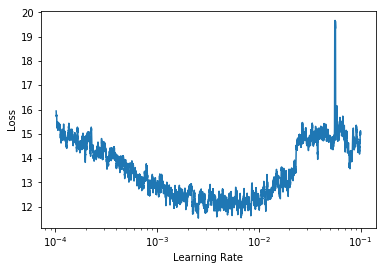

In [69]:
learner.plot_lrs(50)

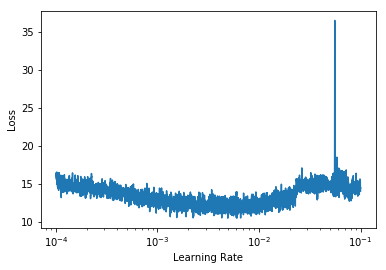

In [71]:
learner.plot_lrs(10)

In [72]:
del cfobj
torch.cuda.empty_cache()

In [73]:
cfobj=cf(n_users,n_emb_user,n_emb_movie,n_movies,min_rating,max_rating,autoenc_cols,dropout_e,hidden,dropouts)
cfobj=cfobj.to(device)

In [74]:
wd=1e-7
optimizer=torch.optim.Adam(cfobj.parameters(),lr=3e-3,betas=(0.9,0.999), weight_decay=wd)
learner=Learner(cfobj,optimizer,None,device,0,12000,0.25,cycle_mult=0)

In [75]:
learner.run_epochs(dltrain,dlvalid,7)

Batch:12000 12.024405774593353  
Epoch:0 Learning rate 0.003 Weight Decay 1e-07 Train Loss:11.907565530904025                 Valid Loss:11.305367641470204 Train RMSE:3.440119329359796 Valid RMSE:3.3515718399170087
Batch:12000 10.696864593903223  
Epoch:1 Learning rate 0.003 Weight Decay 1e-07 Train Loss:10.82738903261999                 Valid Loss:11.304072927221299 Train RMSE:3.2782321926252598 Valid RMSE:3.3520835575677643
Batch:12000 9.767725219825904  
Epoch:2 Learning rate 0.003 Weight Decay 1e-07 Train Loss:10.049008643400825                 Valid Loss:11.389251986807695 Train RMSE:3.155021187909682 Valid RMSE:3.3659516948678405
Batch:12000 9.357600712100664  
Epoch:3 Learning rate 0.003 Weight Decay 1e-07 Train Loss:9.661881358129977                 Valid Loss:11.710171834057281 Train RMSE:3.092339206557385 Valid RMSE:3.4096590500618125
Batch:12000 8.973326646427314  
Epoch:4 Learning rate 0.003 Weight Decay 1e-07 Train Loss:9.295518312363392                 Valid Loss:11.63867

In [77]:
torch.save(cfobj,f=f'{DATAPATH}/inter/cf_plus_model')
torch.save(learner,f=f'{DATAPATH}/inter/cf_plus_learner')
torch.save(optimizer,f=f'{DATAPATH}/inter/cf_plus_optimizer')
torch.save(cfobj.state_dict(),f'{DATAPATH}/inter/cf_plus_state_dict')
torch.save(optimizer.state_dict(),f'{DATAPATH}/inter/cf_plus_optimizer_state_dict')

/home/kirana/anaconda3/lib/python3.7/site-packages/torch/serialization.py:256: UserWarning: Couldn't retrieve source code for container of type cf. It won't be checked for correctness upon loading.
  "type " + obj.__name__ + ". It won't be checked "
/home/kirana/anaconda3/lib/python3.7/site-packages/torch/serialization.py:256: UserWarning: Couldn't retrieve source code for container of type cf. It won't be checked for correctness upon loading.
  "type " + obj.__name__ + ". It won't be checked "


In [78]:
optimizer=torch.optim.Adam(cfobj.parameters(),lr=3e-3,betas=(0.9,0.999), weight_decay=wd)
learner=Learner(cfobj,optimizer,None,device,0,12000,0.25,cycle_mult=2,start_lr=5e-3,end_lr=5e-4)

In [79]:
learner.run_epochs(dltrain,dlvalid,15)

Batch:12000 11.290498573104541  
Epoch:0 Learning rate 0.003 Weight Decay 1e-07 Train Loss:11.306217690288                 Valid Loss:11.369702814948115 Train RMSE:3.3507018119989658 Valid RMSE:3.3602633633250196
Batch:12000 8.715497443457444  
Epoch:1 Learning rate 0.0012247448713915891 Weight Decay 1e-07 Train Loss:8.904089596977968                 Valid Loss:11.773114170707062 Train RMSE:2.9679548379733434 Valid RMSE:3.4194881624533933
Batch:12000 7.0292684685985245  
Epoch:2 Learning rate 0.0005 Weight Decay 1e-07 Train Loss:7.269104495518312                 Valid Loss:12.627216688844982 Train RMSE:2.676313437081153 Valid RMSE:3.538328376516999
Batch:12000 8.598670200149218  
Epoch:3 Learning rate 0.003 Weight Decay 1e-07 Train Loss:9.056144450707489                 Valid Loss:11.854154596610009 Train RMSE:2.9865928306780356 Valid RMSE:3.4306889809799044
Batch:12000 7.606462858537833  
Epoch:4 Learning rate 0.0019168293127388174 Weight Decay 1e-07 Train Loss:7.9290019889895005     

/home/kirana/anaconda3/lib/python3.7/site-packages/torch/serialization.py:256: UserWarning: Couldn't retrieve source code for container of type cf. It won't be checked for correctness upon loading.
  "type " + obj.__name__ + ". It won't be checked "
/home/kirana/anaconda3/lib/python3.7/site-packages/torch/serialization.py:256: UserWarning: Couldn't retrieve source code for container of type cf. It won't be checked for correctness upon loading.
  "type " + obj.__name__ + ". It won't be checked "
